<div class="h1 alert alert" markdown="1" >

# Ames Housing Data & Kaggle Challenge 
</div>

## Intro, Data cleaning, & Exploratory Analysis

<img src='../images/houses9.png'>

### You are tasked with creating a machine learning model based on the Ames Housing Dataset. This model will predict the price of a property at sale.
### The Ames Housing Dataset is contains over 70 columns of different features (of nominal, discrete, and ordinal types) to describe properties in Ames, Iowa that were sold between the years 2006-2010.

Predicting the sale value of a home can be difficult for homeowners who are looking to put their home on the market. The intention of this project is to create a "virtaul appraisal" model that captures the housing market in Ames, Iowa from 2006-2010, and can predict the sale price of a house based on the property's features.

run me! ↓

In [4]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Dataset

The Ames Housing dataset was sourced and designed by a professor who wanted a better dataset to use for an undergraduate regression course, that would mimic real life data, and expose students to issues they may encounter while trying to build models in the workforce. The original journal article about the creation of this dataset is here: [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](http://jse.amstat.org/v19n3/decock.pdf)

The data dictionary can be found at http://jse.amstat.org/v19n3/decock/DataDocumentation.txt, or in the project files. 

### Additional References

<div class="alert alert-block alert-info">
Individual homes within the data set can be referenced directly from the Ames City Assessor webpage via the Parcel ID (PID) found in the data set. Note these are nominal values (non-numeric) so preceding 0’s must be included in the data entry field on the website. Access to the database can be gained from the Ames site (http://www.cityofames.org/assessor/) by clicking on “property search” or by accessing the Beacon (http://beacon.schneidercorp.com/Default.aspx) website and inputting Iowa and Ames in the appropriate fields. A city map showing the location of all the neighborhoods is also available on the Ames site and can be accessed by clicking on “Maps”  and then “Residential Assessment Neighborhoods (City of Ames Only)”.
    </div>

<img src="../images/div2.png">

##  Data Import & Cleaning

### Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train = pd.read_csv('../datasets/train.csv',  keep_default_na=False, na_values='')
test = pd.read_csv('../datasets/test.csv',  keep_default_na=False, na_values='')

#### Data wrangling

The first thing I did was change the the column names to snake case for easier manipulation.

In [7]:
# Convert all columns to snake case
# Training set
train.columns = train.columns.str.lower()
train.columns = [i.replace(" ", "_") for i in list(train.columns)]
train.columns

# Test set
test.columns = test.columns.str.lower()
test.columns = [i.replace(" ", "_") for i in list(test.columns)]
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

### Removing Outliers and Limiting Scope

<div class="alert alert-block alert-info">According to documentation for the dataset, there are five outliers that should be removed from the dataset, two of them being partial sales that don't represent actual market values. These values can be identified by pltting sale prive against gr_liv_area. The data dictionary recommends removing houses over 4000 square feet from the training data.</div>

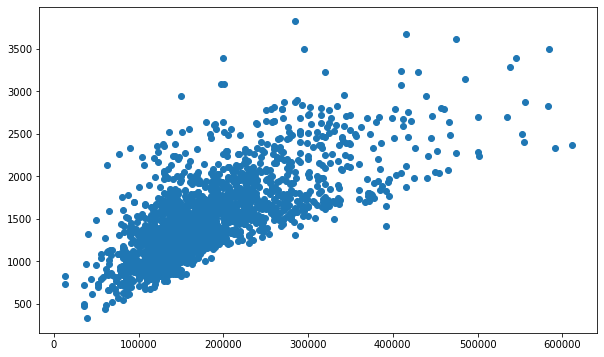

In [46]:
plt.figure(figsize=(10,6));
plt.scatter(train['saleprice'], train['gr_liv_area'])
plt.show()

In [9]:
# Remove houses > 3500 SQ feet
# Training set
train = train[train['gr_liv_area']<4000]  # Removed 2 obs


/usr/local/Cellar/jupyterlab/3.3.0/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


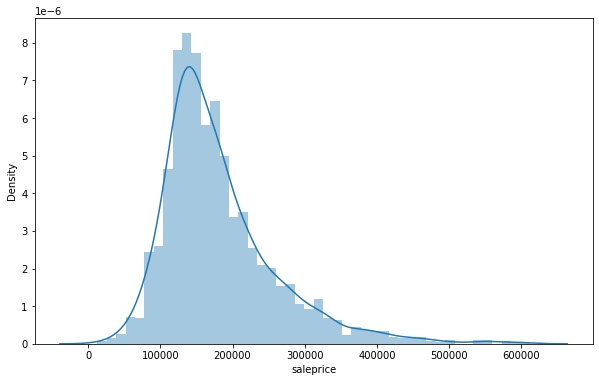

In [45]:
plt.figure(figsize=(10,6));
sns.distplot(train.saleprice);
plt.show();

#### Finding outliers with descriptive statistics

 Next I used .describe() to look at min and max values for all columns in order to identify outliers.

In [10]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2049.000000,2.049000e+03,2049.000000,1719.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2027.000000,2048.000000,2048.000000,2048.000000,2048.000000,2049.000000,2049.00000,2049.000000,2049.000000,2047.000000,2047.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,1935.000000,2048.000000,2048.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1473.676428,7.134001e+08,57.025378,68.878999,10024.677892,6.108346,5.562714,1971.673499,1984.166423,98.797731,438.018555,48.005859,567.525391,1053.549805,1160.848219,329.18692,5.518302,1495.553441,0.426478,0.063019,1.576867,0.370425,2.843826,1.042948,6.428990,0.589068,1978.677519,1.775879,472.878418,93.554417,47.224500,22.593948,2.593948,16.527574,2.165935,43.327965,6.220595,2007.775988,181479.018058
std,844.248064,1.886859e+08,42.837269,22.472112,6608.511749,1.421780,1.104897,30.171293,21.032785,172.563846,439.843609,165.074675,445.019539,426.283435,379.066122,425.59571,51.093509,485.783577,0.521617,0.250971,0.549389,0.500901,0.826804,0.209888,1.544572,0.635842,25.436792,0.764416,214.501543,128.195671,65.857797,59.870165,25.241801,57.399890,36.297124,434.481342,2.742380,1.312533,79295.913255
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.000000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.00000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129800.000000
50%,1481.000000,5.354532e+08,50.000000,68.000000,9405.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.000000,1092.000000,0.00000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2199.000000,9.071760e+08,70.000000,80.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,160.000000,733.000000,0.000000,811.000000,1317.250000,1404.000000,691.00000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3820.000000,1862.00000,1064.000000,3820.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,2207.000000,5.000000,1356.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,611657.000000


There are some large values for square footage, but these seme to be legit accoring to redfin. One value in garage_yr_built looks sus:

In [11]:
train[train['garage_yr_blt'] == 2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NA,NA,NA,0,9,2007,New,267300


In [12]:
train.loc[1699, 'garage_yr_blt'] = 2007

#### Handling nulls

 In order to prevent data leakage between train and validation sets, I decided to wait until after a train/validation split to handle nulls via imputation. Categorical "nulls" (written 'NA' in the data) will be handled in the next section. However, I wanted to get a good idea of what I was working with.

In [13]:
# Check null values
nulls = train.isnull().sum().sort_values(ascending=False)
nulls

lot_frontage       330
garage_yr_blt      114
mas_vnr_type        22
mas_vnr_area        22
bsmt_exposure        4
bsmtfin_type_2       2
bsmt_full_bath       2
bsmt_half_bath       2
garage_cond          1
bsmt_qual            1
garage_finish        1
garage_cars          1
garage_area          1
garage_qual          1
total_bsmt_sf        1
bsmtfin_type_1       1
bsmt_cond            1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_qual         0
totrms_abvgrd        0
functional           0
kitchen_abvgr        0
id                   0
fireplaces           0
fireplace_qu         0
sale_type            0
yr_sold              0
mo_sold              0
misc_val             0
misc_feature         0
fence                0
pool_qc              0
pool_area            0
screen_porch         0
3ssn_porch           0
enclosed_porch       0
open_porch_sf        0
wood_deck_sf         0
paved_drive

Next I checked to see if null values meant that a feature was not included in the house. It appears that there are no nulls for garage_yr_built where there is a garage present, and same for pool_qc and pool_area, so I imputed 0 for these null values.

In [14]:
test[test['garage_yr_blt'].isna() & test['garage_area']>0]
train[train['garage_yr_blt'].isna() & train['garage_area']>0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [15]:
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(0)
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)

These two nulls for bsmt_full_bath are due to the property not having a basement, so I imputed 0 in place of NA

In [16]:
train[train['bsmt_full_bath'].isna()]
train['bsmt_full_bath'] = train['bsmt_full_bath'].fillna(0)
test['bsmt_full_bath'] = test['bsmt_full_bath'].fillna(0)

In [17]:
train['bsmt_half_bath'] = train['bsmt_half_bath'].fillna(0)
test['bsmt_half_bath'] = test['bsmt_half_bath'].fillna(0)

In [18]:
train = train[~train['garage_area'].isna()]

 #### Lot Frontage

The next largest category of nulls is lot frontage. 
"In real estate, frontage is the width of a lot, measured at the front part of the lot." (source:https://www.gimme-shelter.com/frontage-50043/)

There are a lot of missing values for this column. Since lot frontage is closely related to square feet of a lot I decided to impute missing values by multiplying the lot area of a home by the average (frontage:lot area) ratio for the neighborhood it's located in.

In [19]:
train['frontage_pct']=train['lot_frontage']/train['lot_area']
avg_frontage_pct = train.groupby('neighborhood')['frontage_pct'].mean()
train=train.drop(columns='frontage_pct')
pd.DataFrame(avg_frontage_pct)


,frontage_pct
neighborhood,
Blmngtn,0.013806
Blueste,0.012840
BrDale,0.012004
BrkSide,0.008429
ClearCr,0.006305
CollgCr,0.007238
Crawfor,0.007796
Edwards,0.007384
Gilbert,0.006823


In [20]:
train = train.merge(right=avg_frontage_pct, left_on='neighborhood', right_index=True)

In [21]:
train['lot_frontage'] = train['lot_frontage'].fillna( train['lot_area']*train['frontage_pct'] )

In [22]:
# Same process, but for test set
test['frontage_pct']=test['lot_frontage']/test['lot_area']
avg_frontage_pct = test.groupby('neighborhood')['frontage_pct'].mean()
test=test.drop(columns='frontage_pct')
pd.DataFrame(avg_frontage_pct)
test = test.merge(right=avg_frontage_pct, left_on='neighborhood', right_index=True)

test['lot_frontage'] = test['lot_frontage'].fillna( test['lot_area']*test['frontage_pct'] )

In [23]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

In [24]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna(0)
test['mas_vnr_type'] = test['mas_vnr_type'].fillna(0)

In [25]:
train['total_bath']=(train['half_bath']*0.5)+(train['full_bath'])
test['total_bath']=(test['half_bath']*0.5)+(test['full_bath'])

## Data Preprocessing

### Ordinal Scales

 After looking through the data dictionary I saw that a lot of columns are on the same ordinal scale, Excellent-Good-Typical-Fair-Poor (Ex-Gd-TA-Fa-Po-NA). For these columns, 'NA' is used to indicate that the category is not applicable for the property, ie a NA in a garage related column would indicate that the house does not have a garage. 
 
* When converting these ordinal scales to numerical values, I chose to use 0 for the NA entries. 
* i.e. for the basement_qual category, holding all else constant, I'm telling my model that a house with a crappy basement is more valuable than a house with no basement at all
* This is likely true, unless a bad basement somehow affects the structural integrity of the house. I also know this is generally true for flippers, who will buy a house with a crappy/unfinished basement that they can remodel cheaply and put back on the market at a MUCH higher price.

In [26]:
# Convert 10 columns on the same ordinal scale to numerical values.

list1 = ['bsmt_qual', 'bsmt_cond', 'exter_qual', 'exter_cond', 'garage_qual', 'garage_cond', 'heating_qc', 'pool_qc', 'fireplace_qu', 'kitchen_qual']

for i in list1:
    # Training set
    train[i]=train[i].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'na':0, 'Na':0})
    train[i]=pd.to_numeric(train[i])
    train[i]=train[i].fillna(0)
    
    # Test set
    test[i]=test[i].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'na':0, 'Na':0})
    test[i]=pd.to_numeric(test[i])
    test[i]=test[i].fillna(0)

Other ordinal columns use similar ordinal scales, but they are not exactly identical to each other. I converted these to numerical values as well. Most of these columns are directly related to quality and scales represent good->bad quality, so I assigned these scales values in a range of 1-n. 

For subjective categories, I chose to OneHotEncode or use get_dummies instead of converting ordinal scales.

In [27]:
# Checking nulls for other ordinal columns before I use make_num, where null meaning isn't defined in documentation.
train['land_slope'].isna().sum()
train['lot_shape'].isna().sum()

0

In [28]:
# Changing columns on other ordinal scales to 0-n; replacing nulls with 0

def make_num(columnlist, dictionary):
    for i in columnlist:
        # Training set
        train[i]=train[i].map(dictionary)
        train[i]=pd.to_numeric(train[i])
        train[i]=train[i].fillna(0)
        
        # Test set
        test[i]=test[i].map(dictionary)
        test[i]=pd.to_numeric(train[i])
        test[i]=test[i].fillna(0)

In [29]:
make_num(['lot_shape'], {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})

make_num(['land_slope'], {'Sev':0, 'Mod':1, 'Gtl':2})

make_num(['bsmt_exposure'], {'NA':0, 'na':0, 'Na':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}) 

make_num(['functional'], {'Sal':0, 'Sev':1, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

make_num(['garage_finish'], {'NA':0, 'na':0, 'Na':0, 'Unf':1, 'RFn':2}) #NA = No garage

make_num(['paved_drive'], {'N':0, 'P':1, 'Y':2}) 

make_num(['fence'], {'NA':0, 'na':0, 'Na':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})


### Feature Engineering

#### total_porch_sf

In [30]:
train['total_porch_sf']=train['open_porch_sf']+train['enclosed_porch']+train['3ssn_porch']+train['screen_porch']+train['wood_deck_sf']
test['total_porch_sf']=test['open_porch_sf']+test['enclosed_porch']+test['3ssn_porch']+test['screen_porch']+test['wood_deck_sf']

#### total_sf

In [31]:
train['total_sf']=train['total_bsmt_sf']+train['1st_flr_sf']+train['2nd_flr_sf']+train['total_porch_sf']
test['total_sf']=test['total_bsmt_sf']+test['1st_flr_sf']+test['2nd_flr_sf']+test['total_porch_sf']

train.dropna(inplace=True, subset=['total_sf']) #Not working

# train['total_sf']=train['total_sf'].fillna('hi')
# train = train[train['total_sf']!='hi']
# train['total_sf'].isna().sum()

In [32]:
train['total_sf'].isna().sum()

0

#### has_x boolean columns

In [33]:
train['has_pool']=np.where(train['pool_area']>0, 1, 0)
train['has_garage']=np.where(train['garage_area']>0, 1, 0)
train['has_basement']=np.where(train['total_bsmt_sf']>0, 1, 0)
train['has_porch']=np.where(train['total_porch_sf']>0, 1, 0)

test['has_pool']=np.where(test['pool_area']>0, 1, 0)
test['has_garage']=np.where(test['garage_area']>0, 1, 0)
test['has_basement']=np.where(test['total_bsmt_sf']>0, 1, 0)
test['has_porch']=np.where(test['total_porch_sf']>0, 1, 0)

In [34]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

#### Dummifying & combining columns

Since some pairs of columns are only split into two columns to avoid listing multiple values in a single column, I am using get_dummies and then combining the resulting columns by feature. 
 
In other words, the real features are inside "containers" in my dataset, so I'm unpacking and combining them since doesn't matter much if they're in container 1 or container 2.

First I dummified condition_1 and condition_2. These columns contain the exact same 'sets' of possible values. The 'Norm' column is dropped from the resulting dataframes as it is redundant and only exists to indicate that there are no special conditions for a property.

In [35]:
# Train set
a = pd.get_dummies(train['condition_1']).drop(columns='Norm').fillna(0) 
b = pd.get_dummies(train['condition_2']).drop(columns='Norm').fillna(0) 
c = a.add(b, fill_value=0)
train = (pd.merge(left=train, right=c, left_index=True, right_index=True)).drop(columns=['condition_1', 'condition_2'])

# Test set
a = pd.get_dummies(test['condition_1']).drop(columns='Norm').fillna(0) 
b = pd.get_dummies(test['condition_2']).drop(columns='Norm').fillna(0) 
c = a.add(b, fill_value=0)
test =(pd.merge(left=test, right=c, left_index=True, right_index=True)).drop(columns=['condition_1', 'condition_2'])

train.head(5)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,frontage_pct,total_bath,total_porch_sf,total_sf,has_pool,has_garage,has_basement,has_porch,Artery,Feedr,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,109,533352170,60,RL,100.972204,13517,Pave,NA,2,Lvl,AllPub,CulDSac,2,Sawyer,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2.0,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500,0.00747,2.5,44,2248.0,0,1,1,1,0,0,0,0,1,0,0.0,0
17,770,905101490,20,RL,80.000000,8816,Pave,NA,3,Lvl,AllPub,Corner,2,Sawyer,1Fam,1Story,5,6,1963,1963,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,3.0,3.0,1.0,Rec,651.0,Unf,0.0,470.0,1121.0,GasA,3,Y,SBrkr,1121,0,0,1121,1.0,0.0,1,0,3,1,3,5,8,0,0,Detchd,1963.0,1.0,2.0,480.0,3,3,2,0,80,0,0,0,0,0,3,NA,0,6,2009,WD,139000,0.00747,1.0,80,2322.0,0,1,1,1,0,1,0,0,0,0,0.0,0
18,2063,905107140,20,RL,71.000000,8197,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,148.0,3,3,CBlock,3.0,3.0,1.0,Unf,0.0,Unf,0.0,660.0,660.0,GasA,5,Y,SBrkr,1285,0,0,1285,0.0,0.0,1,1,3,1,3,7,8,1,3,Attchd,1977.0,2.0,2.0,528.0,3,3,2,138,0,0,0,0,0,0,3,NA,0,4,2007,WD,143500,0.00747,1.5,138,2083.0,0,1,1,1,0,0,0,0,0,0,0.0,0
20,2062,905106150,20,RL,109.000000,8724,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,5,5,1968,1968,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,4.0,3.0,1.0,BLQ,492.0,Unf,0.0,402.0,894.0,GasA,4,Y,SBrkr,894,0,0,894,0.0,0.0,1,0,3,1,3,5,8,1,1,Attchd,1968.0,0.0,2.0,450.0,3,3,2,0,0,0,0,0,0,0,0,NA,0,5,2007,WD,129000,0.00747,1.0,0,1788.0,0,1,1,0,0,0,0,0,0,0,0.0,0
26,86,532376160,20,RL,65.000000,8450,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,5,8,1965,2009,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,GLQ,553.0,BLQ,117.0,224.0,894.0,GasA,5,Y,SBrkr,894,0,0,894,1.0,0.0,1,0,3,1,3,5,8,1,4,Detchd,1973.0,1.0,1.0,336.0,3,3,2,416,144,0,0,0,0,0,3,NA,0,4,2010,WD,138500,0.00747,1.0,560,2348.0,0,1,1,1,0,0,0,0,1,0,0.0,0


Next I added dummies for the exterior material columns (exterior_1st and exterior_2nd.) 
In this case, a 2 in "VinylSd" will indicate that the whole exterior is Vinyl siding, 1 will indicate part of the house is vinyl siding, and 0 will indicate there is no vinyl siding.

In [36]:
# Train set
a = pd.get_dummies(train['exterior_1st'], drop_first=True).fillna(0) 
b = pd.get_dummies(train['exterior_2nd'], drop_first=True).fillna(0) 
c = a.add(b, fill_value=0)
train = (pd.merge(left=train, right=c, left_index=True, right_index=True)).drop(columns=['exterior_1st', 'exterior_2nd'])

# Test set
a = pd.get_dummies(test['exterior_1st'], drop_first=True).fillna(0) 
b = pd.get_dummies(test['exterior_2nd'], drop_first=True).fillna(0) 
c = a.add(b, fill_value=0)
test =(pd.merge(left=test, right=c, left_index=True, right_index=True)).drop(columns=['exterior_1st', 'exterior_2nd'])

train.head(5)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,frontage_pct,total_bath,total_porch_sf,total_sf,has_pool,has_garage,has_basement,has_porch,Artery,Feedr,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,WdShing
0,109,533352170,60,RL,100.972204,13517,Pave,NA,2,Lvl,AllPub,CulDSac,2,Sawyer,1Fam,2Story,6,8,1976,2005,Gable,CompShg,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2.0,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500,0.00747,2.5,44,2248.0,0,1,1,1,0,0,0,0,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,1,0,0,1,0,0,0,0,0.0,0.0
17,770,905101490,20,RL,80.000000,8816,Pave,NA,3,Lvl,AllPub,Corner,2,Sawyer,1Fam,1Story,5,6,1963,1963,Gable,CompShg,None,0.0,3,3,PConc,3.0,3.0,1.0,Rec,651.0,Unf,0.0,470.0,1121.0,GasA,3,Y,SBrkr,1121,0,0,1121,1.0,0.0,1,0,3,1,3,5,8,0,0,Detchd,1963.0,1.0,2.0,480.0,3,3,2,0,80,0,0,0,0,0,3,NA,0,6,2009,WD,139000,0.00747,1.0,80,2322.0,0,1,1,1,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,2,0,0.0,0.0
18,2063,905107140,20,RL,71.000000,8197,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,6,5,1977,1977,Gable,CompShg,BrkFace,148.0,3,3,CBlock,3.0,3.0,1.0,Unf,0.0,Unf,0.0,660.0,660.0,GasA,5,Y,SBrkr,1285,0,0,1285,0.0,0.0,1,1,3,1,3,7,8,1,3,Attchd,1977.0,2.0,2.0,528.0,3,3,2,138,0,0,0,0,0,0,3,NA,0,4,2007,WD,143500,0.00747,1.5,138,2083.0,0,1,1,1,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,2,0,0,0,0,0.0,0.0
20,2062,905106150,20,RL,109.000000,8724,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,5,5,1968,1968,Gable,CompShg,None,0.0,3,3,CBlock,4.0,3.0,1.0,BLQ,492.0,Unf,0.0,402.0,894.0,GasA,4,Y,SBrkr,894,0,0,894,0.0,0.0,1,0,3,1,3,5,8,1,1,Attchd,1968.0,0.0,2.0,450.0,3,3,2,0,0,0,0,0,0,0,0,NA,0,5,2007,WD,129000,0.00747,1.0,0,1788.0,0,1,1,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,2,0,0.0,0.0
26,86,532376160,20,RL,65.000000,8450,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,5,8,1965,2009,Gable,CompShg,None,0.0,3,4,CBlock,3.0,3.0,1.0,GLQ,553.0,BLQ,117.0,224.0,894.0,GasA,5,Y,SBrkr,894,0,0,894,1.0,0.0,1,0,3,1,3,5,8,1,4,Detchd,1973.0,1.0,1.0,336.0,3,3,2,416,144,0,0,0,0,0,3,NA,0,4,2010,WD,138500,0.00747,1.0,560,2348.0,0,1,1,1,0,0,0,0,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,2,0,0,0,0,0,0.0,0.0


#### bsmtfin_type_1, bsmtfin_type_2, bsmtfin_sf_1, bsmtfin_sf_2

These columns are not very helpful individually, but make sense when interpreted together. 
In order to help my model interpret these, I first dummified columns for besmtfin_type_1 and bsmtfin_type_2. I multiplied the two resulting dataframes by their counterparts (bsmtfin_sf_1 and bsmtfin_sf_2), and then added the two dataframes together.

The resulting dataframe shows how many sq feet each basement has, of each type of finish. 

I chose not to convert the bsmtfin scale to ordinal and multiply finish type by square footage (for a total "basement score"), because I am not sure if a large, unfinished basement is equal in value to a tiny basement that is above average living quarters.

In [37]:
a = pd.get_dummies(train['bsmtfin_type_1']).fillna(0)
b = a.multiply(train['bsmtfin_sf_1'], axis=0)
b.head(4)

c = pd.get_dummies(train['bsmtfin_type_2']).fillna(0)
d = c.multiply(train['bsmtfin_sf_2'], axis=0)
d.head(9)

e = b.add(d, fill_value=0)

e.columns = ['bsmt_sf_'+i for i in list(e.columns)]
e.head(3)

train = (pd.merge(left=train, right=e, left_index=True, right_index=True)).drop(columns=['bsmtfin_type_1','bsmtfin_type_2','bsmtfin_sf_1','bsmtfin_sf_2'])
train.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,frontage_pct,total_bath,total_porch_sf,total_sf,has_pool,has_garage,has_basement,has_porch,Artery,Feedr,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,WdShing,bsmt_sf_ALQ,bsmt_sf_BLQ,bsmt_sf_GLQ,bsmt_sf_LwQ,bsmt_sf_NA,bsmt_sf_Rec,bsmt_sf_Unf
0,109,533352170,60,RL,100.972204,13517,Pave,NA,2,Lvl,AllPub,CulDSac,2,Sawyer,1Fam,2Story,6,8,1976,2005,Gable,CompShg,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2.0,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500,0.00747,2.5,44,2248.0,0,1,1,1,0,0,0,0,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,1,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,533.0,0.0,0.0,0.0,0.0
17,770,905101490,20,RL,80.000000,8816,Pave,NA,3,Lvl,AllPub,Corner,2,Sawyer,1Fam,1Story,5,6,1963,1963,Gable,CompShg,None,0.0,3,3,PConc,3.0,3.0,1.0,470.0,1121.0,GasA,3,Y,SBrkr,1121,0,0,1121,1.0,0.0,1,0,3,1,3,5,8,0,0,Detchd,1963.0,1.0,2.0,480.0,3,3,2,0,80,0,0,0,0,0,3,NA,0,6,2009,WD,139000,0.00747,1.0,80,2322.0,0,1,1,1,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651.0,0.0
18,2063,905107140,20,RL,71.000000,8197,Pave,NA,3,Lvl,AllPub,Inside,2,Sawyer,1Fam,1Story,6,5,1977,1977,Gable,CompShg,BrkFace,148.0,3,3,CBlock,3.0,3.0,1.0,660.0,660.0,GasA,5,Y,SBrkr,1285,0,0,1285,0.0,0.0,1,1,3,1,3,7,8,1,3,Attchd,1977.0,2.0,2.0,528.0,3,3,2,138,0,0,0,0,0,0,3,NA,0,4,2007,WD,143500,0.00747,1.5,138,2083.0,0,1,1,1,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
a = pd.get_dummies(test['bsmtfin_type_1']).fillna(0)
b = a.multiply(test['bsmtfin_sf_1'], axis=0)
b.head(4)

c = pd.get_dummies(test['bsmtfin_type_2']).fillna(0)
d = c.multiply(test['bsmtfin_sf_2'], axis=0)
d.head(9)

e = b.add(d, fill_value=0)

e.columns = ['bsmt_sf_'+i for i in list(e.columns)]
e.head(3)

test = (pd.merge(left=test, right=e, left_index=True, right_index=True)).drop(columns=['bsmtfin_type_1','bsmtfin_type_2','bsmtfin_sf_1','bsmtfin_sf_2'])
test.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,frontage_pct,total_bath,total_porch_sf,total_sf,has_pool,has_garage,has_basement,has_porch,Artery,Feedr,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stucco,VinylSd,Wd Sdng,Wd Shng,WdShing,bsmt_sf_ALQ,bsmt_sf_BLQ,bsmt_sf_GLQ,bsmt_sf_LwQ,bsmt_sf_NA,bsmt_sf_Rec,bsmt_sf_Unf
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,2,Lvl,AllPub,Inside,2,OldTown,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,None,0.0,3,2,Stone,2,3,1.0,1020,1020,GasA,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,2.0,1,440,1,1,2,0,60,112,0,0,0,0,0,NA,0,4,2006,WD,0.008219,2.0,172,3120,0,1,1,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NA,3,Lvl,AllPub,Inside,2,OldTown,1Fam,1Story,5,6,1923,2006,Gable,CompShg,None,0.0,4,3,CBlock,3,3,1.0,968,968,GasA,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,0.0,2,480,2,3,2,0,0,184,0,0,0,0,0,NA,0,7,2007,WD,0.008219,1.0,184,2120,0,1,1,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,2,0.0,0.0,0,0,0,0,0,0,0
6,1327,902427150,20,RM,52.0,8516,Pave,NA,3,Lvl,AllPub,Inside,2,OldTown,1Fam,1Story,4,6,1958,2006,Gable,CompShg,None,0.0,3,3,CBlock,3,3,4.0,869,869,GasA,3,Y,SBrkr,1093,0,0,1093,0,0,1,0,2,1,3,5,8,0,0,Detchd,1959.0,0.0,1,308,3,3,2,0,0,0,0,0,0,0,0,NA,0,5,2008,WD,0.008219,1.0,0,1962,0,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0


##  Exploratory Viz

#### Dropping highly correlated columns

In [68]:
corrs = train.corr().abs()
corrs = pd.DataFrame(corrs.unstack().sort_values(kind="quicksort"))
corrs = corrs.sort_values(by=0, ascending=False)
corrs.columns=['corr']
corrs[(corrs['corr'] > 0.50) & (corrs['corr'] < 1)]

,,corr
has_garage,garage_yr_blt,0.998569
garage_yr_blt,has_garage,0.998569
CmentBd,CemntBd,0.988253
CemntBd,CmentBd,0.988253
id,yr_sold,0.975782
yr_sold,id,0.975782
has_pool,pool_qc,0.959254
pool_qc,has_pool,0.959254
garage_yr_blt,garage_cond,0.954585
garage_cond,garage_yr_blt,0.954585


In [122]:
#move export to datasets folder
train.to_csv('train2.csv')
test.to_csv('test2.csv')

In [ ]:
test.head(3)